In [1]:
from datascience import *
import pandas as pd 
import sklearn as sk
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plots
%matplotlib inline
from ipywidgets import interact, interactive, fixed, interact_manual

In [2]:
data = pd.read_csv("SIREN_data_cleaned.csv")
def df_interact(df):
    '''
    Outputs sliders that show rows and columns of df
    '''
    def peek(row=0, col=0):
        return df.iloc[row:row + 7, col:col + 7]
    interact(peek, row=(0, len(df), 7), col=(0, len(df.columns) - 7))
    print('({} rows, {} columns) total'.format(df.shape[0], df.shape[1]))
labels = data.columns.values

logistic regression (linear)
kNN,
regression tree, CART (classification a... regression tree)

In [4]:
data

,case_control,age,sex,height,BMI,life_tob,life_alc,life_vegetarian,life_stim,life_cocaine,htn,dm,stroke,obesity,heart,sickle_cell,stress,depression
0,0,71,1,162.0,25.148605,2,1,0,0,0,1,0,0,0,0,0,0,0
1,0,71,1,156.0,23.833005,2,1,0,0,0,0,0,0,0,0,0,0,0
2,0,40,1,168.0,23.030045,2,3,0,0,0,1,0,0,0,0,0,0,0
3,0,79,1,151.5,22.002200,2,4,0,0,0,0,0,0,0,0,0,1,1
4,0,62,1,170.0,21.626298,2,4,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2837,1,75,2,158.0,26.077552,0,0,0,0,0,1,0,0,0,0,0,0,0
2838,1,62,1,162.0,19.852157,0,0,0,0,0,1,0,0,0,0,0,0,0
2839,1,53,1,187.0,28.596757,0,0,0,0,0,1,0,0,0,0,0,0,0
2840,1,42,2,168.0,20.549887,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
df_interact(data)

interactive(children=(IntSlider(value=0, description='row', max=2842, step=7), IntSlider(value=0, description=…

(2842 rows, 18 columns) total


In [22]:
lst = []
for i in range(len(labels)):
    y = np.asarray(data[labels[i]])
    lst.append(y)
lst = np.array(lst)
lst

array([[ 0.,  0.,  0., ...,  1.,  1.,  1.],
       [71., 71., 40., ..., 53., 42., 85.],
       [ 1.,  1.,  1., ...,  1.,  2.,  1.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [30]:
corr_matrix = np.corrcoef(lst).round(decimals=2)
corr_matrix = pd.DataFrame(data=corr_matrix,index=labels,columns=labels)


interactive(children=(IntSlider(value=0, description='row', max=18, step=7), IntSlider(value=0, description='c…

(18 rows, 18 columns) total


(18.0, 0.0)

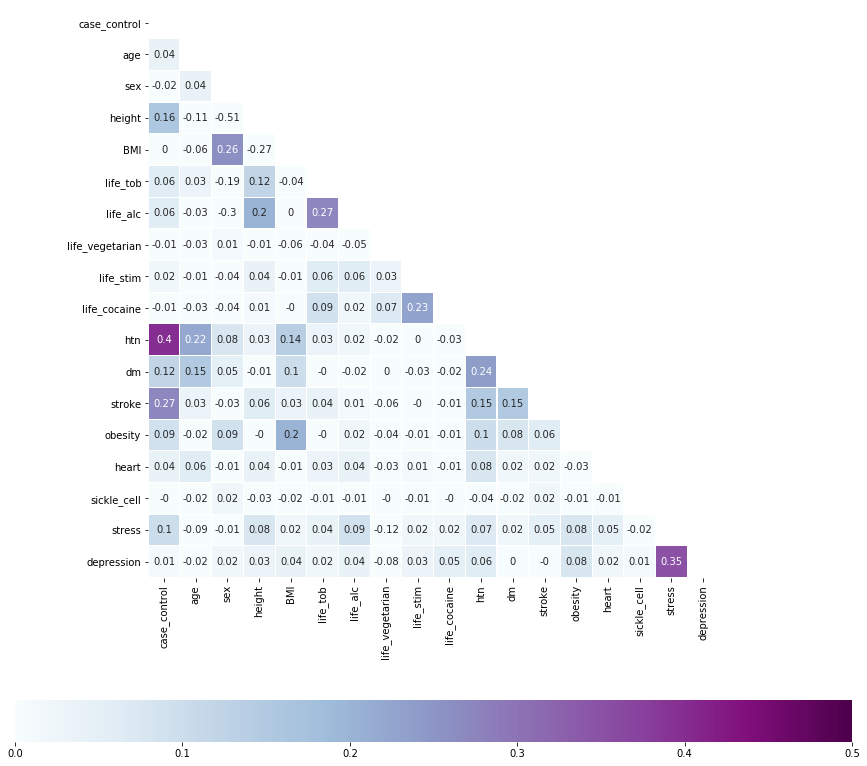

In [76]:
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

fig, ax = plots.subplots(figsize=(15,15)) 
sns.heatmap(corr_matrix, cmap="BuPu", cbar_kws={"orientation": "horizontal"}, mask = mask, vmin = 0, vmax = 0.5, annot = True, linewidths = 0.05, square = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [93]:
def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.average(x))/np.std(x,ddof=1)  

def correlation(x, y):
    x_in_standard_units = standard_units(x)
    y_in_standard_units = standard_units(y)
    if len(x)!=len(y):
        raise ValueError('arrays are of different lengths')
    return sum(x_in_standard_units * y_in_standard_units)/(len(x)-1)


def bootstrap_correlation(df,x, y, repetitions):
    # the number of observations
    n=df.shape[0]
    # Bootstrap the scatter, find the slope, collect
    corr = make_array()
    for i in np.arange(repetitions):
        bootstrap_sample = df.sample(n,replace=True)
        bootstrap_corr = correlation(bootstrap_sample[x], bootstrap_sample[y])
        corr = np.append(corr, bootstrap_corr)
    
    # Find the endpoints of the 95% confidence interval for the true slope
    left = percentile(2.5, corr)
    right = percentile(97.5, corr)
    
    # Slope of the regression line from the original sample
    observed_corr = correlation(df[x],df[y])
    
    # Display results
    print('Correlation between x and y:', observed_corr)
    print('Approximate 95%-confidence interval for the true correlation:')
    print(left, 'to', right)
 

In [97]:
df_htn = data[["case_control","htn"]]
bootstrap_correlation(df_htn, "case_control","htn", 1000)

Correlation between x and y: 0.3960823826046436
Approximate 95%-confidence interval for the true correlation:
0.36227308088625826 to 0.43039121999971125


In [96]:
df_height = data[["case_control","height"]]
bootstrap_correlation(df_height, "case_control","height", 1000)

Correlation between x and y: 0.16340264898792484
Approximate 95%-confidence interval for the true correlation:
0.1314405092903892 to 0.19834395071509933


In [98]:
df_dm = data[["case_control","dm"]]
bootstrap_correlation(df_dm, "case_control","dm", 1000)

Correlation between x and y: 0.1206162409367179
Approximate 95%-confidence interval for the true correlation:
0.08447847552626202 to 0.15865659296149867


In [99]:
df_stroke = data[["case_control","stroke"]]
bootstrap_correlation(df_stroke, "case_control","stroke", 1000)

Correlation between x and y: 0.26968659297088476
Approximate 95%-confidence interval for the true correlation:
0.2447028569460166 to 0.2946005219203112


In [100]:
df_stress = data[["case_control","stress"]]
bootstrap_correlation(df_stress, "case_control","stress", 1000)

Correlation between x and y: 0.10023696172058409
Approximate 95%-confidence interval for the true correlation:
0.06309417654783635 to 0.1387481341560982


In [7]:
x = data[["height", "htn", "dm", "stroke", "stress"]]
y = data[["case_control"]]

In [10]:
x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(x, y, test_size=0.46, random_state=0)

In [12]:
logisticRegr = sk.linear_model.LogisticRegression()
logisticRegr.fit(x_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
predictions = logisticRegr.predict(x_test)

In [14]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.7224770642201835


In [15]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[578 213]
 [150 367]]


In [17]:
y_test_a = y_test.to_numpy()
y_test_a

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [1]])

In [18]:
predictions

array([0, 0, 1, ..., 0, 1, 0])

In [26]:
ns_probs = [0 for _ in range(len(y_test))]
ns_probs

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [24]:
lr_probs = logisticRegr.predict_proba(x_test)
lr_probs = lr_probs[:, 1]
lr_probs

array([0.201255  , 0.19108233, 0.55075832, ..., 0.23356425, 0.61160262,
       0.19372069])

In [28]:
ns_auc = sk.metrics.roc_auc_score(y_test_a, ns_probs)
lr_auc = sk.metrics.roc_auc_score(y_test_a, lr_probs)

0.7653546792127097

In [29]:
ns_fpr, ns_tpr, _ = sk.metrics.roc_curve(y_test_a, ns_probs)
lr_fpr, lr_tpr, _ = sk.metrics.roc_curve(y_test_a, lr_probs)

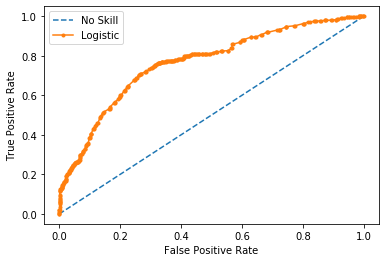

In [37]:
plots.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plots.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plots.xlabel('False Positive Rate')
plots.ylabel('True Positive Rate')
# show the legend
plots.legend()
# show the plot
plots.savefig("mygraph.png")


array([0.798745  , 0.80891767, 0.44924168, ..., 0.76643575, 0.38839738,
       0.80627931])